<a href="https://colab.research.google.com/github/ktsverkun/LearnII/blob/main/MLIntro_seminar_3_predict_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

---

**В этой тетради мы**

* Рассмотрим задачу предсказания цены на подержанные автомобили Ford;
* Продолжим знакомство с основными библиотеками для работы с данными: Pandas, Matplotlib и Scikit-learn;
* Выясним, какие методы предварительной обработки данных необходимо применить перед обучением моделей.
* Обучим ансамблевую модель XGBoost и линейную модель LinearRegression;
* Научимся считать важные метрики задачи регрессии;
* Научимся определять натренированность и устойчивость модели c помощью кросс-валидации;
* Научимся подбирать наилучшие параметры модели с помощью поиска по сетке.

---



# Предсказание цены на подержанные автомобили Ford

![](https://www.ford.com/cmslibs/content/dam/vdm_ford/live/en_us/ford/nameplate/f-150/2019/collections/billboard/3_2/19_FRD_F15_40813_SPORT_V2-167.jpg/_jcr_content/renditions/cq5dam.web.1280.1280.jpeg)

**Бизнес-постановка задачи**

Оценка подержанного автомобиля - это достаточно трудная задача, так как на стоимость влияют различные факторы, например, возраст автомобиля, его состояние, пробег и даже личное отношение продавца. Таким образом, цена подержанных автомобилей на рынке не является постоянной. И поскольку нет прозрачности в её образовании, а спрос растет ежегодно, у нечестных предпринимателей возникает стимул иррационально завышать цену. Модель для оценки стоимости подержанного автомобиля помогла бы покупателям не переплатить за желаемое авто, а честным продавцам быстро устанавливать цену, соответствующую их предложениям.

**Постановка задачи анализа данных**

Целью данной задачи является прогнозирование цены на подержанные автомобили Ford с помощью построения регрессионных моделей и их анализа. Набор данных состоит из информации о транспортных средствах, выставленных на продажу на сайте Craigslist. Данные опубликованы в открытом доступе на платформе Kaggle.

## Обзор доступных данных

В выборке 7017 наблюдений и 12 характеристик для каждого из объектов (штат продажи, год выпуска, технические характеристики автомобиля, цена транспортного средства и т.д.). Пустые значения указывают на то, что о соответствующей характеристики нет информации.

**Доступные признаки**

|Название поля 	 |Описание      	                              |Название поля   |Описание                                  |
|:--------------:|:----------------------------------------------:|:--------------:|:----------------------------------------:|
|**price**       |Цена                                            |**transmission**|Коробка передач                           |
|**year**        |Год производства 	                              |**drive**       |Привод                                    |
|**condition**   |Состояние        	                              |**size**        |Полноразмер или нет                       |
|**cylinders**   |Количество цлиндров 	                          |**lat**         |Широта 	                                  |
|**odometer**    |Пробег                                          |**long**        |Долгота  	                              |
|**title_status**|Статус авто|**weather**     |Среднегодовая температура в городе продажи|




---



# План анализа данных

  1. Загрузить данные для обучения;
  2. Обработать данные перед обучением модели;
  3. Обучить и провалидировать модель;
  4. Попробовать улучшить модель с помощью подбора параметров.



---


# 1. Загрузить данные для обучения

## 1.1 Загружаем библиотеки

Для решения задачи нам понадобятся уже знакомые:
* библиотека **pandas** для работы с табличными данными (Excel, CSV и др.);
* библиотека **matplotlib** для работы с двумерной и трехмерной графиков;
* библиотека **scikit-learn**, де-факто наиболее популярный, разносторонний, хорошо документированный и постоянно обогащающийся инструмент для построения моделей машинного обучения;
* библиотека **numpy** для обработки массивов чисел, с помощью которой можно быстро создавать массивы, производить над ними вычисления, сортировать и т.д.




In [ ]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
# позволяет отображать графики прямо в ноутбуке
%matplotlib inline

Некоторые библиотеки могут выводить на экран предупреждения, которые важно учитывать в "боевых" задачах. Но в учебной тетради мы укажем Python'у игнорировать их.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## 1.2. Загрузим данные



Загружаем данные с помощие команды `!wget`. Для того, чтобы игнорировать сообщения в процессе загрузки используем магическую команду `%%capture` в первой строке.

In [ ]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [ ]:
!ls

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки **pandas** для загрузки таких данных `read_excel()`.

В функцию передаем один атрибут: название таблицы с данными.

In [ ]:
data = pd.read_excel('data_ford_price.xlsx')

**Упражнение.**
* Проверьте, что данные загрузились правильно, используя метод `head()`;
* Посмотрите на их размер с помощью метода `shape`;
* Какие типы имеют признаки в данных? Есть ли пропуски? Используйте метод `info()`, чтобы проверить.  

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info()

Типы в наших данных:
* 4 признаков типа **object** - обычно это строковые значения;
* 5 признака типа **int64** - целочисленные значения;
* 3 признака типа **float64** - числа с плавающей запятой.

In [ ]:
data['size'].value_counts()

In [ ]:
data['size'].isna().sum()

## 1.3. Посмотрим общую статистику по числовым данным

Посмотрим на статистики загруженной выборки. Для этого вызовем метод `describe()` для наших данных. Для удобства отображения мы транспонируем результат: меняем местами столбцы и строки.

Помним о том, что метод `describe()` выводит статистики только для числовых переменных.

In [ ]:
data.describe().T

Что интересного мы отсюда видим?

* среднее состояние автомобилей на 2.6 из 5: причем cостояние 75% автомобилей ниже 3.0;
* самый ранний год производства автомобиля 1957, причем 75% автомобилей произведены до 2013 года.



**Упражнение.** Посмотрите на гистограммы признаков в таблице `data` с помощью метода `hist()`, установите размер картинки `figsize=(20,12)`.

In [ ]:
data.hist(figsize=(20,12));

# 2. Обработать данные перед обучением модели

## 2.1. Обработка пропусков в данных


<a href="https://drive.google.com/uc?id=1oBVbNi9xUsQObgLV0fA0oP4To5AbLc7j
" target="_blank"><img src="https://drive.google.com/uc?id=1oBVbNi9xUsQObgLV0fA0oP4To5AbLc7j"
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>


Как мы уже видели выше, в наших данных есть пропуски (значения *NaN*). Давайте посмотрим, в каких колонках есть пропуски:

In [ ]:
data.isna().sum()

In [ ]:
### Количество строк, в которых есть хоть один NaN
(data.isna().sum(1) > 0).sum()

In [ ]:
# data.isna().sum(1)

Не хотелось бы терять такое количество данных (25%)! Давайте постараемся их сохранить.

In [ ]:
### Колонка 'drive' - категориальная фича
data['drive'].value_counts()

In [ ]:
### Колонка 'size' - категориальная фича
data['size'].value_counts()

In [ ]:
### Добавляем категорию
data['drive'].fillna('unknown', inplace=True)
data['size'].fillna('unknown', inplace=True)

In [ ]:
### Колонка 'size' - категориальная фича
data['size'].value_counts()

In [ ]:
data['weather'].hist(bins=20)

Заполнение пропусков числового признака зависит от модели:
- Для линейных моделей (Linear Regression, Logistic Regression, SVM) — лучше использовать среднее или медиану, чтобы сохранить распределение признака. В случае категориальных признаков, можно заполнить пропуски самым частым представителем.
- Для моделей на деревьях (XGBoost, Random Forest и др.) — можно подставить любое фиксированное значение (например, -999), а лучше дополнительно создать бинарный признак, который указывает на наличие пропуска.

В нашем случае количество пропусков в колонке `weather` незначительное — всего 2.5%. Поэтому мы можем спокойно удалить эти строки, не потеряв качество данных.

In [ ]:
data = data.dropna()

In [ ]:
data.shape

## 2.2 Работаем с целевой переменной

В данном случае по условию задачи мы должны прогнозировать стоимость автомобиля, целевая переменная - это price.

Для удобства сразу отделим целевую переменную от остальных признаков, а затем удалим ее из исходной таблицы с помощью метода `drop()`.

In [ ]:
y = data['price']
y.shape

(6837,)

In [ ]:
x = data.drop(columns='price')
x.shape

(6837, 11)

In [ ]:
x.head()

,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0


## 2.3 Предобработка категориальных переменных

На прошлой лекции мы рассмотрели два способа обработки текстовых категориальных признаков:
* Label Encoding - когда каждому уникальному значению присваивается число и общее количество признаков не меняется;

  <a href="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8
" target="_blank"><img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F6476f92b-cebf-4cea-8098-ebc92e2d6166_1326x705.jpeg" alt="IMAGE ALT TEXT HERE" width="400" border="0" /></a>

* One Hot Encoding - когда для каждой категории создается новый столбец, при этом 1 ставится, если у объекта имеется данная категория. **Важно:** этот способ преобразования мы можем использовать и для числовых категориальных признаков, если это уместно при решении задачи.

  <a href="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8
" target="_blank"><img src="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8"
alt="IMAGE ALT TEXT HERE" width="800" border="0" /></a>

**⚠️ Проблема Label Encoding:** Линейные модели могут интерпретировать эти числа как имеющие порядок или расстояние между ними, что не соответствует реальности и может привести к ошибкам. Например, если категориям "зеленый", "красный" и "черный" присвоены значения 1, 2 и 3 соответственно, модель может ошибочно считать, что "зеленый" ближе к "красный", чем к "черный".



Когда использовать One Hot Encoding:
- При работе с линейными моделями (Linear Regression, Logistic Regression, Support Vector Machines (SVM))
- Когда категории не имеют естественного порядка (например, цвета, города, имена брендов).


Когда использовать Label Encoding:
- Когда категории имеют логический порядок, например: low < medium < high. В этом случае Label Encoding отражает реальную иерархию.

  <a href="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8
" target="_blank"><img src="https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F4752d819-8d28-4f62-a2f8-ab07af9ed48e_1431x702.jpeg"
alt="IMAGE ALT TEXT HERE" width="400" border="0" /></a>

- Можно использовать в моделях на деревьях (Decision Trees, Random Forest и XGBoost), если категориальный признак имеет небольшое число уникальных значений. В таких случаях деревья не воспринимают числовые метки как упорядоченные.
_______

В наших данных есть следующие категориальные текстовые признаки: `title_status`, `transmission`, `drive`, `size`, `condition`, `cylinders`. При этом `title_status`, `transmission`, `drive`, `size` - это текстовые признаки, `condition`, `cylinders` - числовые признаки.

Имеющиеся текстовые признаки мы, безусловно, должны закодировать, так как машина умеет работать только с числовыми представлениями.

**Вопрос.** Но должны ли мы преобразовывать признаки `cylinders` и `condition`?

Напоминание:
- `condition` = Cостояние автомобиля,
- `cylinders` = Количество цлиндров.

<Axes: >

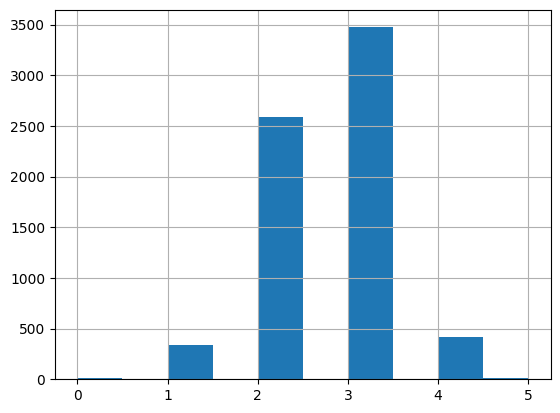

In [ ]:
x['condition'].hist()

In [ ]:
x['cylinders'].value_counts()

,count
cylinders,
8,4751
6,2058
10,11
4,11
5,5
3,1


Мы будем кодировать признаки `title_status`, `transmission`, `drive`, `size`, `cylinders` c помощью one-hot-encoding:

Для удобства создадим отдельный список `columns_to_change` с названиями признаков, которые мы хотим закодировать, и `others_columns` с названиями остальных признаков.

In [ ]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']

for column in columns_to_change:
  print('Число уникальных значений призкака {}: '.format(column), data[column].nunique())

Число уникальных значений призкака cylinders:  6
Число уникальных значений призкака title_status:  5
Число уникальных значений призкака transmission:  3
Число уникальных значений призкака drive:  4
Число уникальных значений призкака size:  5


In [ ]:
#columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
others_columns = ['condition', 'year', 'odometer', 'lat', 'long', 'weather']

**Способ 1:** `pd.get_dummies()` превращает одну колонку с категориями во множество бинарных колонок — по одной на каждое уникальное значение.

In [ ]:
pd.get_dummies(x, columns=columns_to_change)

,year,condition,odometer,lat,long,weather,cylinders_3,cylinders_4,cylinders_5,cylinders_6,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_unknown,size_compact,size_full-size,size_mid-size,size_sub-compact,size_unknown
0,2016,4,43500,36.471500,-82.483400,59.0,False,False,False,True,...,False,True,False,False,False,False,True,False,False,False
1,2009,2,98131,40.468826,-74.281734,52.0,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2,2002,2,201803,42.477134,-82.949564,45.0,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
3,2000,1,170305,40.764373,-82.349503,49.0,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
5,2003,3,167662,45.518031,-122.578752,50.0,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,2015,3,23500,32.680700,-117.169800,59.0,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
7013,2005,2,0,38.213303,-85.785762,50.0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
7014,2006,3,161514,37.609783,-120.995406,59.0,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
7015,2011,2,164000,43.140600,-93.385000,47.0,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


**Способ 2:** Трансформации библиотеки `sklearn`.

In [ ]:
### 1. Импорт выбранного кодировщика
from sklearn.preprocessing import OneHotEncoder

### Для LabelEncoding все тоже самое, только другой кодировщик
# from sklearn.preprocessing import LabelEncoder

### 2. Инициализация кодировщика
one_hot_encoder = OneHotEncoder()

Мы используем метод `fit()`, чтобы кодировщик запомнил уникальные значения в выбранных признаках. В качестве аргумента передаётся таблица с выбранными для преобразования признаками.

Метод `transform()` применяется для преобразования данных.

С помощью метода `get_feature_names()` можно получить список названий новых признаков, которые появились после кодирования.

In [ ]:
### 3. Обучение (подгонка) кодировщика на выбранном признаке
one_hot_encoder.fit(x[columns_to_change])

### 4. Преобразование выбранного признака
data_onehot = one_hot_encoder.transform(x[columns_to_change]).toarray()

### 5. Получим название новых колонок
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)

In [ ]:
data_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Поскольку объект data_onehot не является объектом класса `DataFrame()`, с которым нам проще работать, то явно преобразуем его в этот тип. Для этого передадим полученное значение в класс `DataFrame()`, зададим названия колонок с помощью переменной `columns` и объекты запишем с такими же индексами, как и в табличке `x`.

In [ ]:
data_onehot = pd.DataFrame(data_onehot, index=x.index, columns=column_names)
data_onehot.shape

(6837, 23)

In [ ]:
data_onehot.head()

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,title_status_clean,title_status_lien,title_status_missing,title_status_rebuilt,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_unknown,size_compact,size_full-size,size_mid-size,size_sub-compact,size_unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
### Соединяем новую табличку с исходной
data_new = pd.concat([x, data_onehot], axis=1)

### Удаляем исходные неизменные признаки
data_new = data_new.drop(columns=columns_to_change)

In [ ]:
data_new.head()

,year,condition,odometer,lat,long,weather,cylinders_3,cylinders_4,cylinders_5,cylinders_6,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_unknown,size_compact,size_full-size,size_mid-size,size_sub-compact,size_unknown
0,2016,4,43500,36.471500,-82.483400,59.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2009,2,98131,40.468826,-74.281734,52.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2002,2,201803,42.477134,-82.949564,45.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2000,1,170305,40.764373,-82.349503,49.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,2003,3,167662,45.518031,-122.578752,50.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Посмотрим, что получилось.

In [ ]:
x.shape

(6837, 11)

In [ ]:
data_new.shape

(6837, 29)

In [ ]:
data_new.head(3)

,year,condition,odometer,lat,long,weather,cylinders_3,cylinders_4,cylinders_5,cylinders_6,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_unknown,size_compact,size_full-size,size_mid-size,size_sub-compact,size_unknown
0,2016,4,43500,36.471500,-82.483400,59.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2009,2,98131,40.468826,-74.281734,52.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2002,2,201803,42.477134,-82.949564,45.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data_new

In [ ]:
y.head()

,price
0,43900
1,15490
2,2495
3,1300
5,6995


Зачем использовать sklearn, если можно использовать pandas в одну строчку?

- Возможность делать обратные преобразования
- Преобразования из библиотеки sklearn можно объединять в последовательности, и применять все вместе.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
X = [['red'], ['green'], ['blue']]
X_encoded = encoder.fit_transform(X)

# Обратное преобразование
X_original = encoder.inverse_transform(X_encoded)

In [ ]:
pd.DataFrame(X)

,0
0,red
1,green
2,blue


In [ ]:
X_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
X_original

array([['red'],
       ['green'],
       ['blue']], dtype=object)

# 3. Обучить и провалидировать модель

**Xgboost** - это библиотека с открытым исходным кодом, обеспечивающая высокопроизводительную реализацию деревьев решений с градиентным бустингом.

Описание и документация библиотеки (на английском): https://xgboost.readthedocs.io/en/latest/python/python_api.html

Сегодня мы будем использовать ансамблевую модель **XGBRegressor**, предназначенную для решения задач регрессии.


*Напоминание.* Градиентный бустинг над решающими деревьями имеет ряд преимуществ против других алгоритмов:
* подходит сразу и для классификации, и для регрессии, и для задачи ранжирования;
* имеет высокую обобщающую способность;
* сложно допустить переобучение.


In [ ]:
from xgboost import XGBRegressor

Создаем прототип класса модели:
* установим `silent=True`, чтобы в процессе валидации не печатались предупреждения.

In [ ]:
boosting_tree_model = XGBRegressor(n_estimators=100, silent=True)
boosting_tree_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Рассмотрим наиболее важные гиперпараметры ансамблевой модели **XGBRegressor**:
* гиперпараметр **n_estimators** определяет, сколько деревьев использовать в модели;
* гиперпараметр **max_depth** ограничивает максимальную глубину дерева.

## 3.1. Разделение на обучающую и тестовую выборку

![alt text](https://drive.google.com/uc?id=1Ilkmp248M0kKA3wFJQNQcNEY9OFsVoWz)

Стандартно для правильной валидации модели используют отложенную выборку. То есть мы разбиваем наши данные на **тренировочную** выборку, **тестовую** выборку и **отложенную** выборку. Соответственно, обучаем модель на тренировочной, в ходе обучения проверяем результат на тестовой выборке, а в конце обучения, чтобы оценить качество модели, ошибку считаем на отложенной выборке.

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=1wgVvskPBQJgiRwpsHUmUOS-MhfBatsWy"
alt="IMAGE ALT TEXT HERE" width="480" border="0" /></a>

*Замечание:* тестовая и отложенная выборка могут совпадать. Главное - на этой части данных модель не обучается!


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
?train_test_split

In [ ]:
data_new.shape, y.shape

((6837, 29), (6837,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_new, y, test_size=0.25, random_state=2)

In [ ]:
# X_train
# y_train

In [ ]:
print('Размер обучающей выборки:', X_train.shape[0])
print('Размер тестовой выборки:', X_test.shape[0])

Размер обучающей выборки: 5127
Размер тестовой выборки: 1710


In [ ]:
X_train.shape

(5127, 29)

### 3.2 Обучаем Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [ ]:
### Обучение
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
### Предсказание на тестовой выборке
preds_lin_reg = linear_reg.predict(X_test)

In [ ]:
preds_lin_reg

array([ 6908.0139428 , 24928.01003543,  8943.29653478, ...,
         196.95867697, 17736.28192217, 15629.69114992])

In [ ]:
# y_test

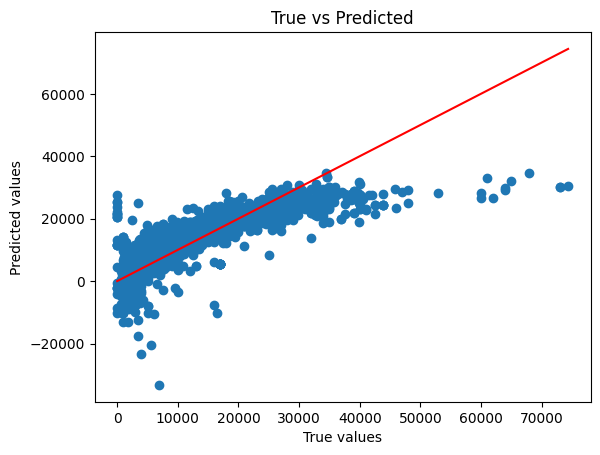

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds_lin_reg)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [ ]:
# from sklearn.metrics import r2_score

In [ ]:
# r2_score(y_test, preds_lin_reg)

## 3.3 Кросс-валидация - наш способ сохранить больше данных!

Однако, при таком подходе в обучении модели участвует только тренировочная выборка. Тестовую и отложенную мы используем только для проверки. Если у нас мало данных - это непозволительная роскошь.

Другой популярный подход это **кросс-валидация** или скользящий контроль. Суть метода заключается в том, что мы делаем не одно разбиение датесета, а несколько разбиений таким образом, чтобы все данные использовались и в обучении и для проверки. Такие разбиения называются **фолдами**.

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=14fZpuBDsTMqv1XtLJvcKMNNa1vlr_ZG6"
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>


Преимущества такого подхода:
* используем все данные для обучения;
* можем оценить устойчивость модели. Если ошибки полученные на разных фолдах сильно отличаются, что модель неустойчива.

Недостаток метода в том, что нам нужно обучать не одну модель, а несколько (столько, сколько мы выбрали фолдов).

На практике часто выбирают 5 фолдов.

Для того, чтобы использовать описанный подход при кросс-валидации, воспользуемся функцией `KFold` из модуля **model_selection** библиотеки **sklearn** и функцией `cross_val_score`.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

Сначала создаем прототип валидатора (способа разделения переменных):
```python
kfold = KFold()
```

Укажем:
* **n_splits=10** - количество фолдов;
* **shuffle=True** - перемешивание элементы выборки;
* **random_state=2** - параметр, который фиксирует "случайность" для воспроизводимости результатов на разных компьютерах.

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=2)
kfold

KFold(n_splits=5, random_state=2, shuffle=True)

Теперь вспомним **метрики качества регрессионной модели**:

 * **MAE** (**mean_absolute_error**) - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * **RMSE** - корень из **mean_squared_error**, где **mean_squared_error** - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$
 * **r2_score** - коэффициент детерминации регрессионной модели.  Модели с коэффициентом детерминации выше 0.8 можно признать достаточно хорошими. Равенство коэффициента детерминации 1 означает, что объясняемая переменная в точности описывается рассматриваемой моделью.

Функция `cross_val_score` воспроизводит разбиение, обучение и тестирование в соответствие с типом и параметрами передаваемого в нее валидатора.

В нее передаем оцениваемую модель, таблицу входных данных, выходную переменную, способ разделения данных (фолды) и метрику, которую мы хотим оценить. В данном случае мы хотим оценить **r2_score**.

На выходе получим значения метрик. Так как мы передали в `KFold` с параметром **n_splits=5**, то и значений мы получим **5**.

In [ ]:
boosting_tree_model = XGBRegressor(n_estimators=100, silent=True)

r2_scores = cross_val_score(boosting_tree_model, data_new, y, cv=kfold, scoring='r2')
r2_scores

array([0.90732241, 0.9191221 , 0.91965854, 0.90185475, 0.59072149])

In [ ]:
r2_scores.mean()

np.float64(0.8561947047710419)

In [ ]:
for fold, (train_idx, test_idx) in enumerate(kfold.split(data_new)):

    print(f"Fold {fold+1} (size = {y.iloc[test_idx].shape[0]}): y test mean = {y.iloc[test_idx].mean():.2f}, std = {y.iloc[test_idx].std():.2f}")


Fold 1 (size = 1368): y test mean = 14574.81, std = 11283.18
Fold 2 (size = 1368): y test mean = 14777.96, std = 10697.87
Fold 3 (size = 1367): y test mean = 14860.96, std = 10728.59
Fold 4 (size = 1367): y test mean = 14802.28, std = 10717.70
Fold 5 (size = 1367): y test mean = 14592.66, std = 13374.87


In [ ]:
linear_reg = LinearRegression()

r2_scores_linear = cross_val_score(linear_reg, data_new, y, cv=kfold, scoring='r2')
r2_scores_linear

array([0.62251004, 0.65523139, 0.69374902, 0.68564202, 0.66953961,
       0.66163383, 0.66330153, 0.51688932, 0.58344537, 0.3128864 ])

In [ ]:
r2_scores_linear.mean()

np.float64(0.6064828522106296)

⚠️ После `cross_val_score` модель, переданная как аргумент, остается не обученой! `cross_val_score` внутри себя:
  - Клонирует модель (`boosting_tree_model` или `linear_reg`)
  - Обучает её отдельно на каждом фолде
  - Возвращает метрики на валидационных частях
  - Не сохраняет финальную обученную модель

**Упражнение 2.** Оцените среднее `mean()` и разброс `std()` по полученным значениям метрик.

In [ ]:
r2_scores_linear.std()

np.float64(0.11023501882613101)

In [ ]:
r2_scores.std()

np.float64(0.14668740939629826)

**Упражнение 3.** Попробуйте оценить модель с помощью другой метрики:
* `scoring = neg_mean_absolute_error` - **минус** метрика MAE;
* `scoring = neg_root_mean_squared_error` - **минус** метрика RMSE.

In [ ]:
-cross_val_score(linear_reg, data_new, y, cv=kfold, scoring='neg_mean_absolute_error')

array([4653.53190658, 4301.61413619, 4393.70746689, 4378.14224146,
       4715.04426962])

In [ ]:
y.mean()

np.float64(14721.720198917654)

# 4. Подбор гиперпараметров модели. Поиск по сетке (Grid search)

<a href="https://drive.google.com/uc?id=1Goc0VR5I--q9rYj-vYlmddanKP3-3sLJ
" target="_blank"><img src="https://drive.google.com/uc?id=1Goc0VR5I--q9rYj-vYlmddanKP3-3sLJ"
alt="IMAGE ALT TEXT HERE" width="480" border="0" /></a>


Теперь, когда у нас есть надёжный способ оценивать качество модели, мы можем перейти к подбору гиперпараметров модели.

Чтобы выработать некоторую интуицию о самых важных параметрах градиентного бустинга на решающих деревьях, сначала мы попробуем в ручную поменять их и посмотреть, как меняются метрики.

Для удобства мы написали функцию, которая принимает параметры `max_depth`, `n_estimators` модели **XGBRegressor**, выборку и целевую переменную, и возвращает среднее значение метрик MAE, RMSE и R2 при кросс-валидации на 5 фолдах.

In [ ]:
?XGBRegressor

In [ ]:
def hyperparamters_search(max_depth, n_estimators, points, target):
  # инициализируем модель и способ валидации
  xgb_regression_model = XGBRegressor(max_depth=max_depth,
                                      n_estimators=n_estimators)

  kfold = KFold(n_splits=5, shuffle=True, random_state=2)

  # считаем метрики в процессе кросс-валидации
  mae_scores = -cross_val_score(xgb_regression_model, points, target, cv=kfold, scoring='neg_mean_absolute_error')
  rmse_scores = -cross_val_score(xgb_regression_model, points, target, cv=kfold, scoring='neg_root_mean_squared_error')
  r2_scores = cross_val_score(xgb_regression_model, points, target, cv=kfold, scoring='r2')

  # считаем среднее по полученным результатам
  mae = mae_scores.mean()
  rmse = rmse_scores.mean()
  r2 = r2_scores.mean()

  print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:3.2f} for xgboost model".format(mae, rmse, r2))

In [ ]:
hyperparamters_search(max_depth=3, n_estimators=50, points=data_new, target=y)

MAE: 2599.30, RMSE: 5006.21, R2: 0.80 for xgboost model


In [ ]:
hyperparamters_search(max_depth=5, n_estimators=100, points=data_new, target=y)

MAE: 1966.03, RMSE: 4547.84, R2: 0.83 for xgboost model


In [ ]:
hyperparamters_search(max_depth=7, n_estimators=300, points=data_new, target=y)

MAE: 1479.36, RMSE: 4450.40, R2: 0.84 for xgboost model


In [ ]:
hyperparamters_search(max_depth=10, n_estimators=100, points=data_new, target=y)

MAE: 1471.95, RMSE: 4318.28, R2: 0.85 for xgboost model


**Упражнение**. Попробуем поподбирать гиперпараметры и посмотреть, как покажет себя модель. Обратите внимание на время обучения:)

## Бонус: Поиск по сетке.

Вместо того, чтобы перебирать параметры руками, можно использовать метод **поиска по сетке** (Grid Search). В процессе поиска по сетке мы указываем варианты каждого из параметров, которые хотим перебрать, а функция смотрит на все их возможные варианты и выдает лучший набор в зависимости от выбранной метрики. Например, на картинке ниже перебираются параметры "регуляризация" и "скорость обучения".

<a href="https://drive.google.com/uc?id=1jAZLpihYxu_FPvN9PIJ1G4S_KvO_6Ku6
" target="_blank"><img src="https://drive.google.com/uc?id=1FhZpRMWuzCXQs1DDdTn11hjmH3MS6C6j"
alt="IMAGE ALT TEXT HERE" width="600" border="0" /></a>

Поиск по сетке реализован в **sklearn**, импортируем его:

In [ ]:
from sklearn.model_selection import GridSearchCV

Ещё раз инициализируем модель XGBRegressor и валидатор KFold.

In [ ]:
xgb_regression_model = XGBRegressor(silent=True, device="cuda")

kfold = KFold(n_splits=5, shuffle=True, random_state=2)

In [ ]:
?XGBRegressor

Нам нужно задать сетку гиперпараметров в виде словаря. Словарь - это такая структура данных, позволяющая хранить объекты, для доступа к которым используется ключ.

Словарь создается с помощью фигурных скобок `{"ключ": "значение"}`.

Соответственно, словарь с гиперпараметрами для перебора будет выглядить следующим образом:

```python
param_grid = {"имя гиперпараметра 1": лист со значениями, "имя гиперпараметра 2": лист со значениями, ... }
```

Для начала выберем маленькую сетку только с `max_depth`, `n_estimators`:

In [ ]:
param_grid = {
    "max_depth": [6, 8, 10, 12],
    "n_estimators": [100,150,200],
}

Инициализируем поиск по сетке. Для этого надо вызвать `GridSearchCV()` и передать ему:

* **estimator** - модель, которую хотим обучать и для которой подбираем гиперпараметры.
* **param_grid** - словарь гиперпараметров, которые будем перебирать.
* **cv** - способ разделения выборки.

In [ ]:
CV_xgb = GridSearchCV(estimator=xgb_regression_model, param_grid=param_grid,
                      scoring='r2', cv=kfold)

Запускаем поиск, используя метод `fit()`. В качестве атрибутов передаем выборку `points_new` и целевую переменную `target`:

In [ ]:
CV_xgb.fit(data_new, y);

Мы можем посмотреть на лучшие найденные параметры, а также получить выбранную метрику для лучшей модели. Для этого надо вызвать `best_params_` и `best_score_` соотвествтенно.

In [ ]:
print(CV_xgb.best_params_)

{'max_depth': 8, 'n_estimators': 150}


In [ ]:
print(CV_xgb.best_score_)

0.8543804526329041


# *Бонус: Определение важности признаков

Очевидно, что не все собранные признаки будут одинаково полезны. После обучения алгоритма мы можем посмотреть какие из признаков больше влияют на результат. Если в наборе данных окажутся бесполезные признаки, то их можно удалить, чтобы уменьшить время обучения. В алгоритмах библиотеки **sklearn** посмотреть на важность признаков можно с помощью свойства `feature_importances_`

Для этого нам нужно еще раз обучить модель на данных. Давайте возьмем самую лучшую модель.

In [ ]:
boosting_tree_model = XGBRegressor(max_depth=3, n_estimators=50)
boosting_tree_model.fit(data_new, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
importances = boosting_tree_model.feature_importances_

In [ ]:
importances

array([0.45127878, 0.04272925, 0.071135  , 0.02954866, 0.03878884,
       0.01380947, 0.        , 0.        , 0.        , 0.01075623,
       0.        , 0.10224938, 0.00934997, 0.00608078, 0.        ,
       0.0200236 , 0.01701925, 0.00665564, 0.00210766, 0.00368678,
       0.06692378, 0.00470743, 0.0618695 , 0.00411307, 0.        ,
       0.02173354, 0.00958066, 0.        , 0.00585267], dtype=float32)

Отсортируем признаки по убыванию важности:

In [ ]:
indices = np.argsort(importances)[::-1]

Отрисуем полученный результат:

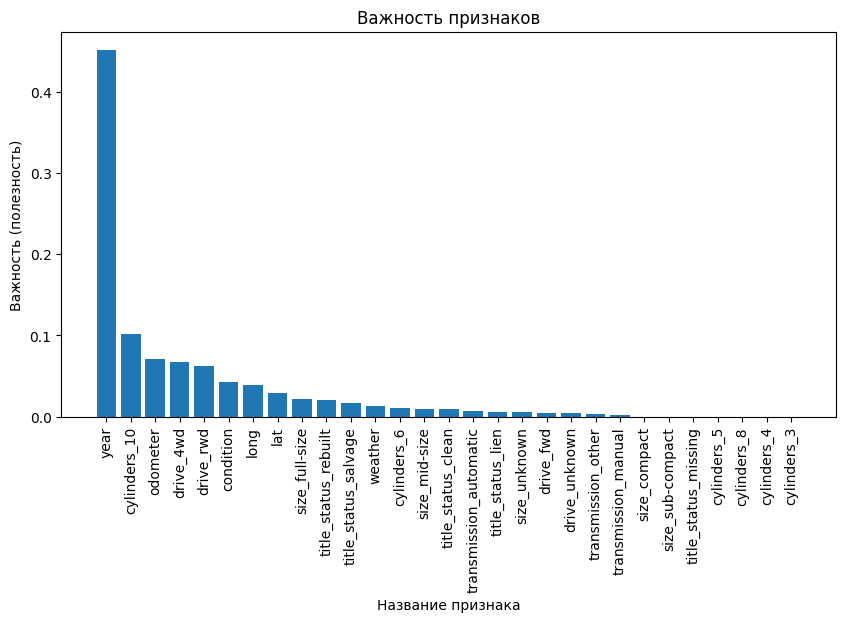

In [ ]:
plt.figure(figsize=(10, 5))

plt.title('Важность признаков')
plt.ylabel('Важность (полезность)')
plt.xlabel('Название признака')

plt.bar(range(len(data_new.columns)), importances[indices])
plt.xticks(range(len(data_new.columns)),data_new.columns[indices],rotation=90)
plt.show()



---

# *Бонус: сохранение и заргузка модели машинного обучения

После долгой работы с моделью, хорошей практикой будет сохранить её в файл. Это позволит использовать её повторно, когда она понадобится. Для этого импортируем методы **dump** и **load** из библиотеки **joblib**.


In [ ]:
from joblib import dump, load

Функция **dump** сохраняет обученную модель в файл. Передаём параметры:
* boosting_tree_model - наша обученная модель.
* 'best_model_ever.joblib' - название файла. Если такого файла ещё не существует, то он создастся автоматически.

In [ ]:
dump(boosting_tree_model, 'best_model_ever.joblib')

['best_model_ever.joblib']

Функция **load** принимает на вход название файла с моделью, и загружает модель из файла.

In [ ]:
loaded_model = load('best_model_ever.joblib')

In [ ]:
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Видим, что мы загрузили именно ту модель, которую и сохраняли. Ее сразу можно использовать для получения предсказаний.

In [ ]:
loaded_model.predict(data_new)

array([33842.516 , 13801.943 ,  3993.3992, ...,  9956.27  , 13100.026 ,
       16788.209 ], dtype=float32)

---
## Обзор результатов семинара

На этом семинаре мы:
* построили модель для предсказания цены на подержанные автомобили;
* посмотрели, как можно удалить пропуски в данных;
* узнали, что такое кросс-валидация, как обучать модель с помощью нее и оценивать качество;
* обсудили, как гиперпараметры влияют на модель и как их можно подбирать с помощью поиска по сетке.